# Zestaw 4 - Język R
### Autor: Jacek Nitychoruk

## Analiza danych z poprzednich laboratorów:
### Polecenie:
W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy))

### Komentarz:
Jako danych użyłem pliku `*.csv` z czasami mnożenia wektorów oraz macierzy przez wektor. Pomiary były wykonywane dla wektorów i macierzy o rozmiarze w zakresie od 500 do 5000 (długość wekttora i długość boku macierzy) ze skokiem co 500.

In [4]:
results = read.csv("results.csv")

results

size,iteration,time_vector,time_matrix
<int>,<int>,<dbl>,<dbl>
500,1,1.200e-06,0.000760799
500,2,1.700e-06,0.000776700
500,3,1.100e-06,0.001112000
500,4,1.700e-06,0.001883100
500,5,1.600e-06,0.001715701
500,6,1.500e-06,0.001658199
500,7,1.100e-06,0.068477400
500,8,1.800e-06,0.001093700
500,9,1.200e-06,0.001021100


### Wyniki zagregowane
Poniżej wyniki zagregowane według rozmiaru:

In [149]:
avg_results = aggregate( cbind(time_vector, time_matrix) ~ size, data=results, FUN=mean)

avg_results$vec_sd = aggregate( time_vector ~ size, data=results, FUN=sd)$time_vector
avg_results$matrix_sd = aggregate( time_matrix ~ size, data=results, FUN=sd)$time_matrix

### Wykresy zależności czasu mnożenia od rozmiaru danych


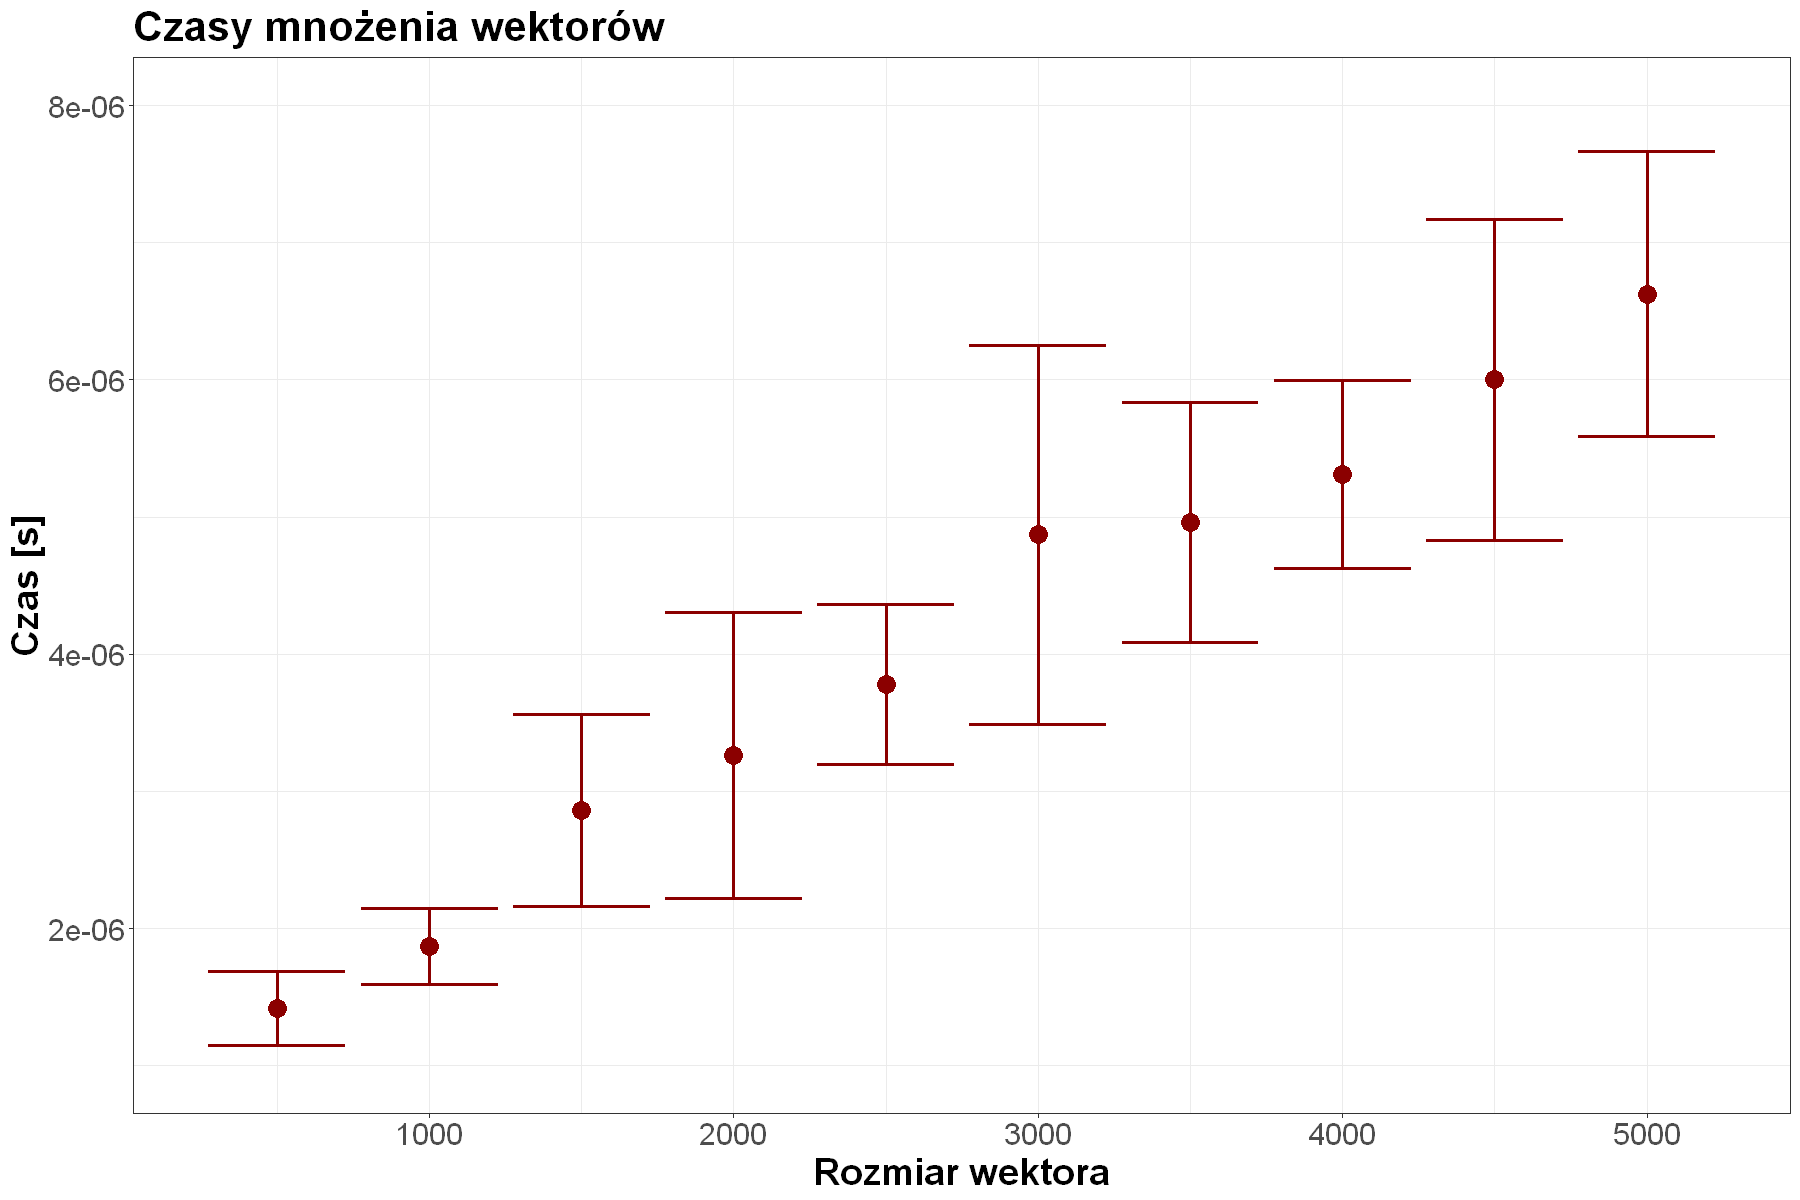

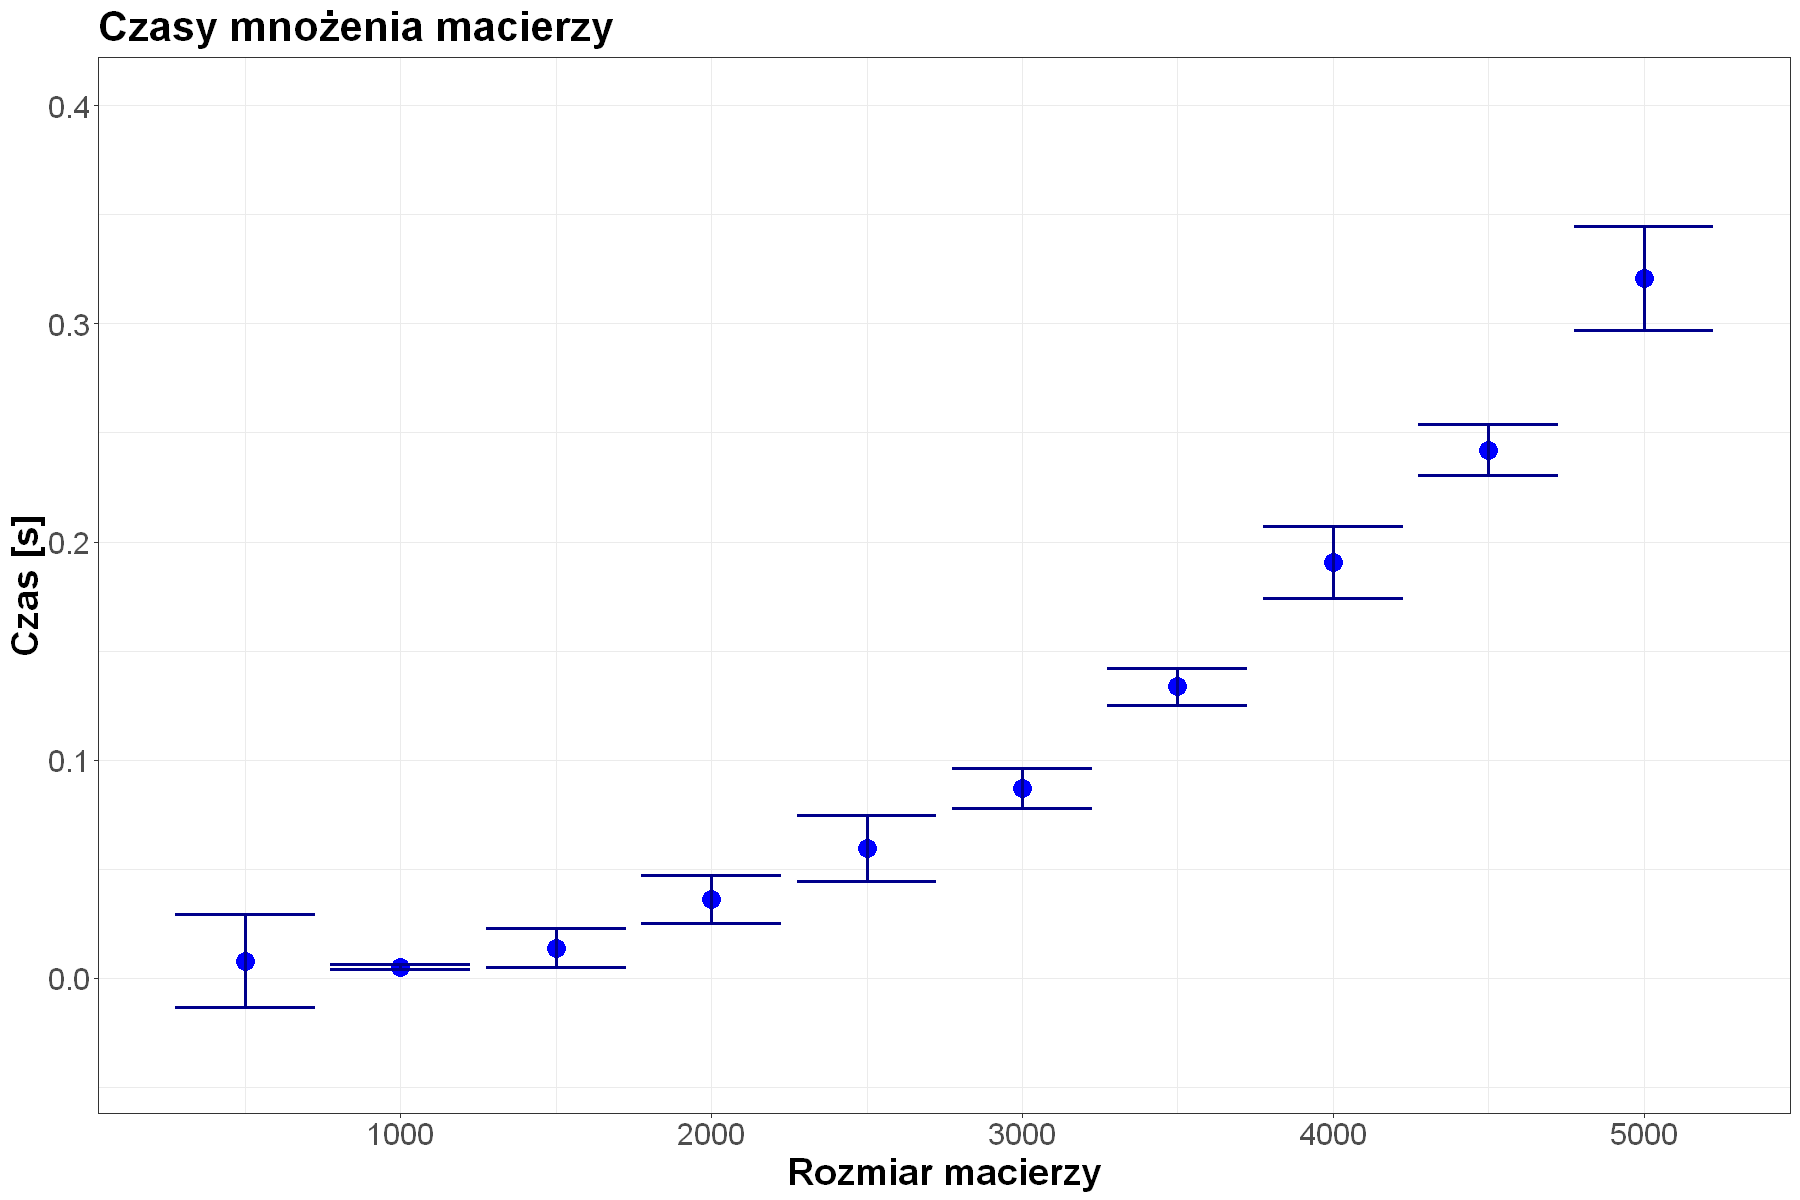

In [130]:
library(repr)
library("ggplot2")
options(repr.plot.width=15, repr.plot.height=10)
ggplot(avg_results, aes(size, time_vector)) +
geom_point(colour = "darkred", size = 5) + 
geom_errorbar(ymin = avg_results$time_vector-avg_results$vec_sd, 
              ymax=avg_results$time_vector+avg_results$vec_sd, 
              size = 1, 
              color="darkred") +
theme_bw() +
theme(axis.text=element_text(size=18),
      axis.title=element_text(size=22,face="bold"),
      plot.title = element_text(size=25, face="bold")) +
ylim(1e-06, 8e-06) + 
labs(title ="Czasy mnożenia wektorów", x = "Rozmiar wektora", y = "Czas [s]")

ggplot(avg_results, aes(size, time_matrix)) +
geom_point(colour = "blue", size = 5) + 
geom_errorbar(ymin = avg_results$time_matrix-avg_results$matrix_sd, 
              ymax= avg_results$time_matrix+avg_results$matrix_sd, 
              size = 1, 
              color="darkblue") +
theme_bw() +
theme(axis.text=element_text(size=18),
      axis.title=element_text(size=22,face="bold"),
      plot.title = element_text(size=25, face="bold")) +
ylim(-0.04, 0.4) + 
labs(title ="Czasy mnożenia macierzy", x = "Rozmiar macierzy", y = "Czas [s]")


Przy użyciu aproksymacji wielomianowej dla algorytmu mnożącego wektory obliczony został najlepszy wielomian 1 stopnia (w przypadku wektorów przyrost czasu jest liniowy), a dla mnożenia macierzy obliczony został najlepszy wielomian 3 stopnia

### Aproksymacja wielomianami:
#### Wektory:

In [346]:
poly_vec = data.frame(x = seq(0,5500, length.out=300))

x <- avg_results$size
y <- avg_results$time_vector
fit_vec= lm(y ~ poly(x, 1, raw=TRUE), data=avg_results)

poly_vec$y = predict(fit_vec, poly_vec)

fit_vec


Call:
lm(formula = y ~ poly(x, 1, raw = TRUE), data = avg_results)

Coefficients:
           (Intercept)  poly(x, 1, raw = TRUE)  
             9.558e-07               1.142e-09  


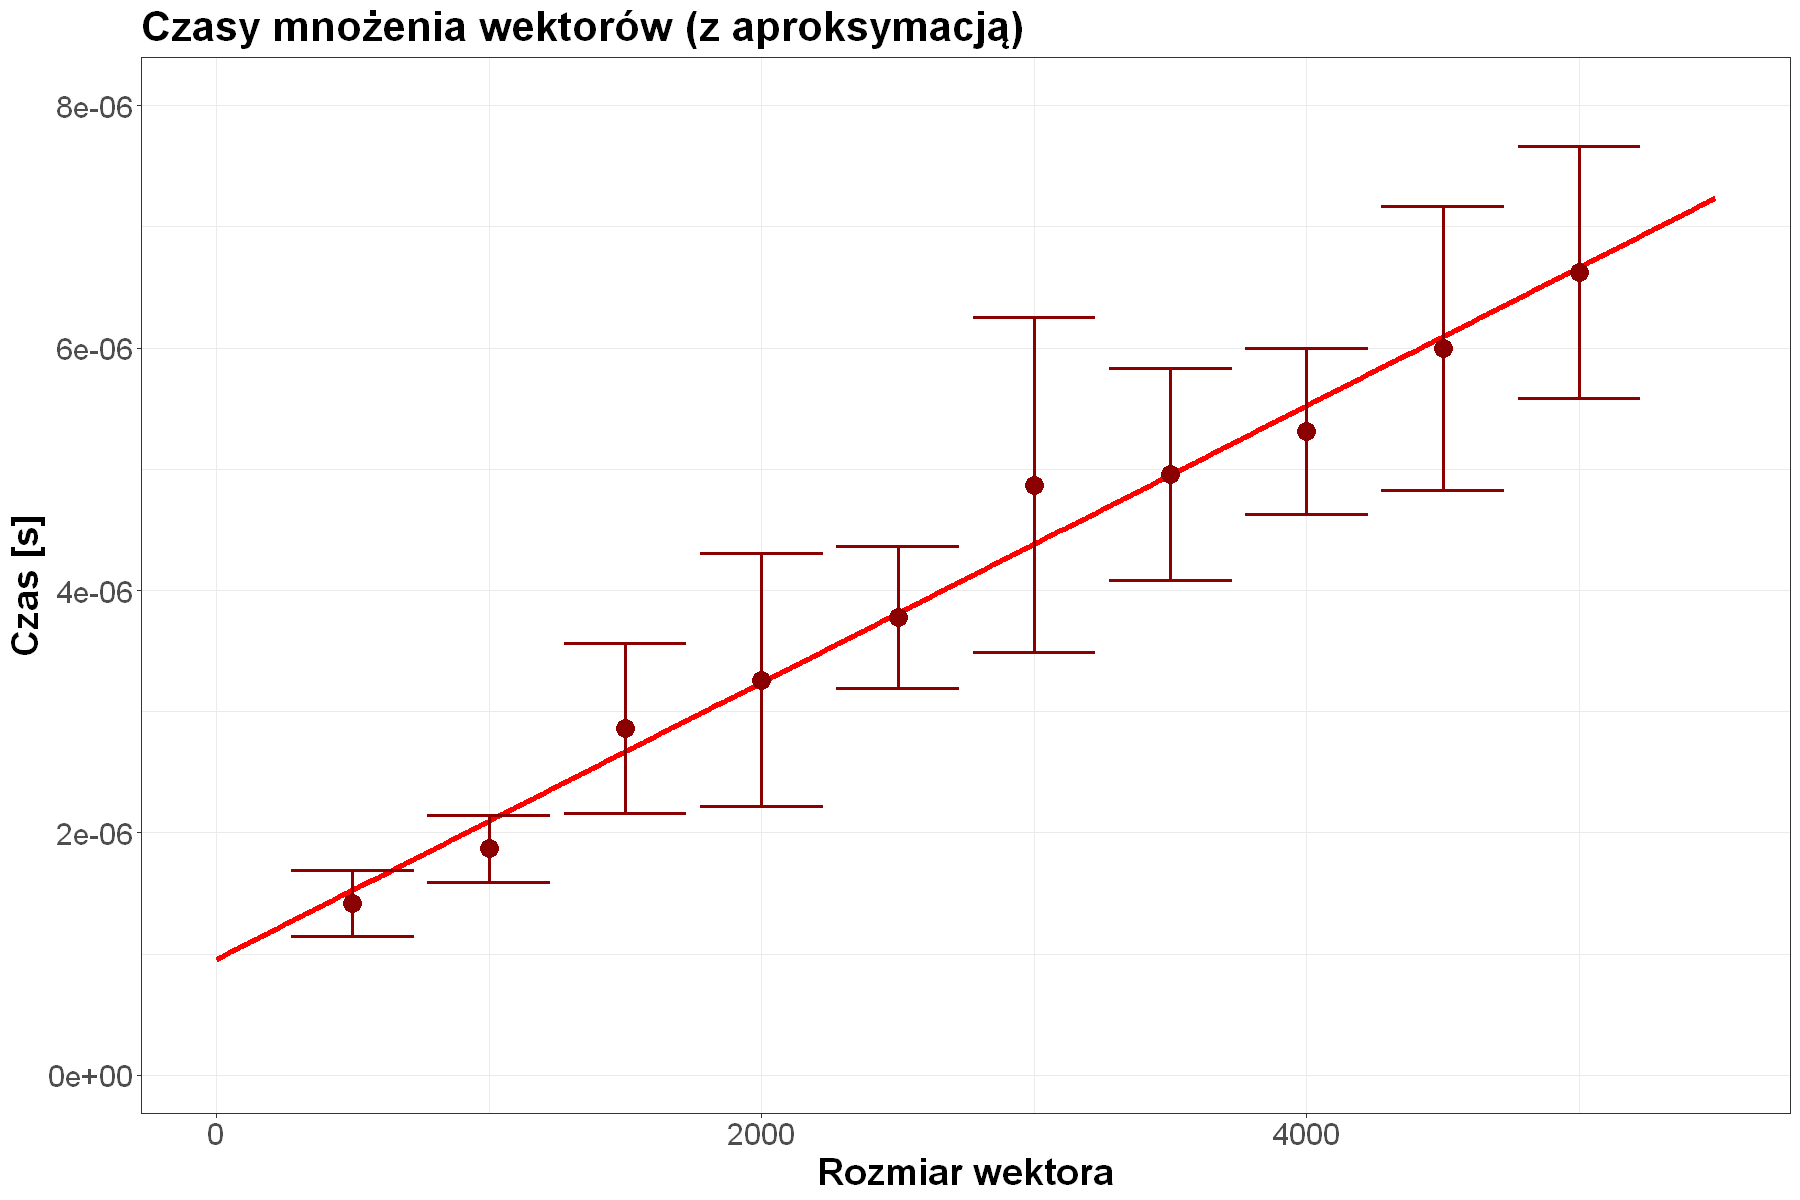

In [250]:
library(repr)
library("ggplot2")
options(repr.plot.width=15, repr.plot.height=10)
ggplot(avg_results, aes(size, time_vector))  +
geom_line(data=poly_vec, aes(x,y), colour="red", size=1.5) +
geom_point(colour = "darkred", size = 5) + 
geom_errorbar(ymin = avg_results$time_vector-avg_results$vec_sd, 
              ymax=avg_results$time_vector+avg_results$vec_sd, 
              size = 1, 
              color="darkred") +
theme_bw() +
theme(axis.text=element_text(size=18),
      axis.title=element_text(size=22,face="bold"),
      plot.title = element_text(size=25, face="bold")) +
ylim(0.08e-06, 8e-06) + 
labs(title ="Czasy mnożenia wektorów (z aproksymacją)", x = "Rozmiar wektora", y = "Czas [s]")

#### Macierze:

In [254]:
x <- avg_results$size
y <- avg_results$time_matrix
fit_matrix= lm(y ~ poly(x, 3, raw=TRUE), data=avg_results)
poly_vec$matrix= predict(fit_matrix, poly_vec)

fit_matrix


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = avg_results)

Coefficients:
            (Intercept)  poly(x, 3, raw = TRUE)1  poly(x, 3, raw = TRUE)2  
              1.280e-02               -1.974e-05                1.391e-08  
poly(x, 3, raw = TRUE)3  
              4.581e-13  


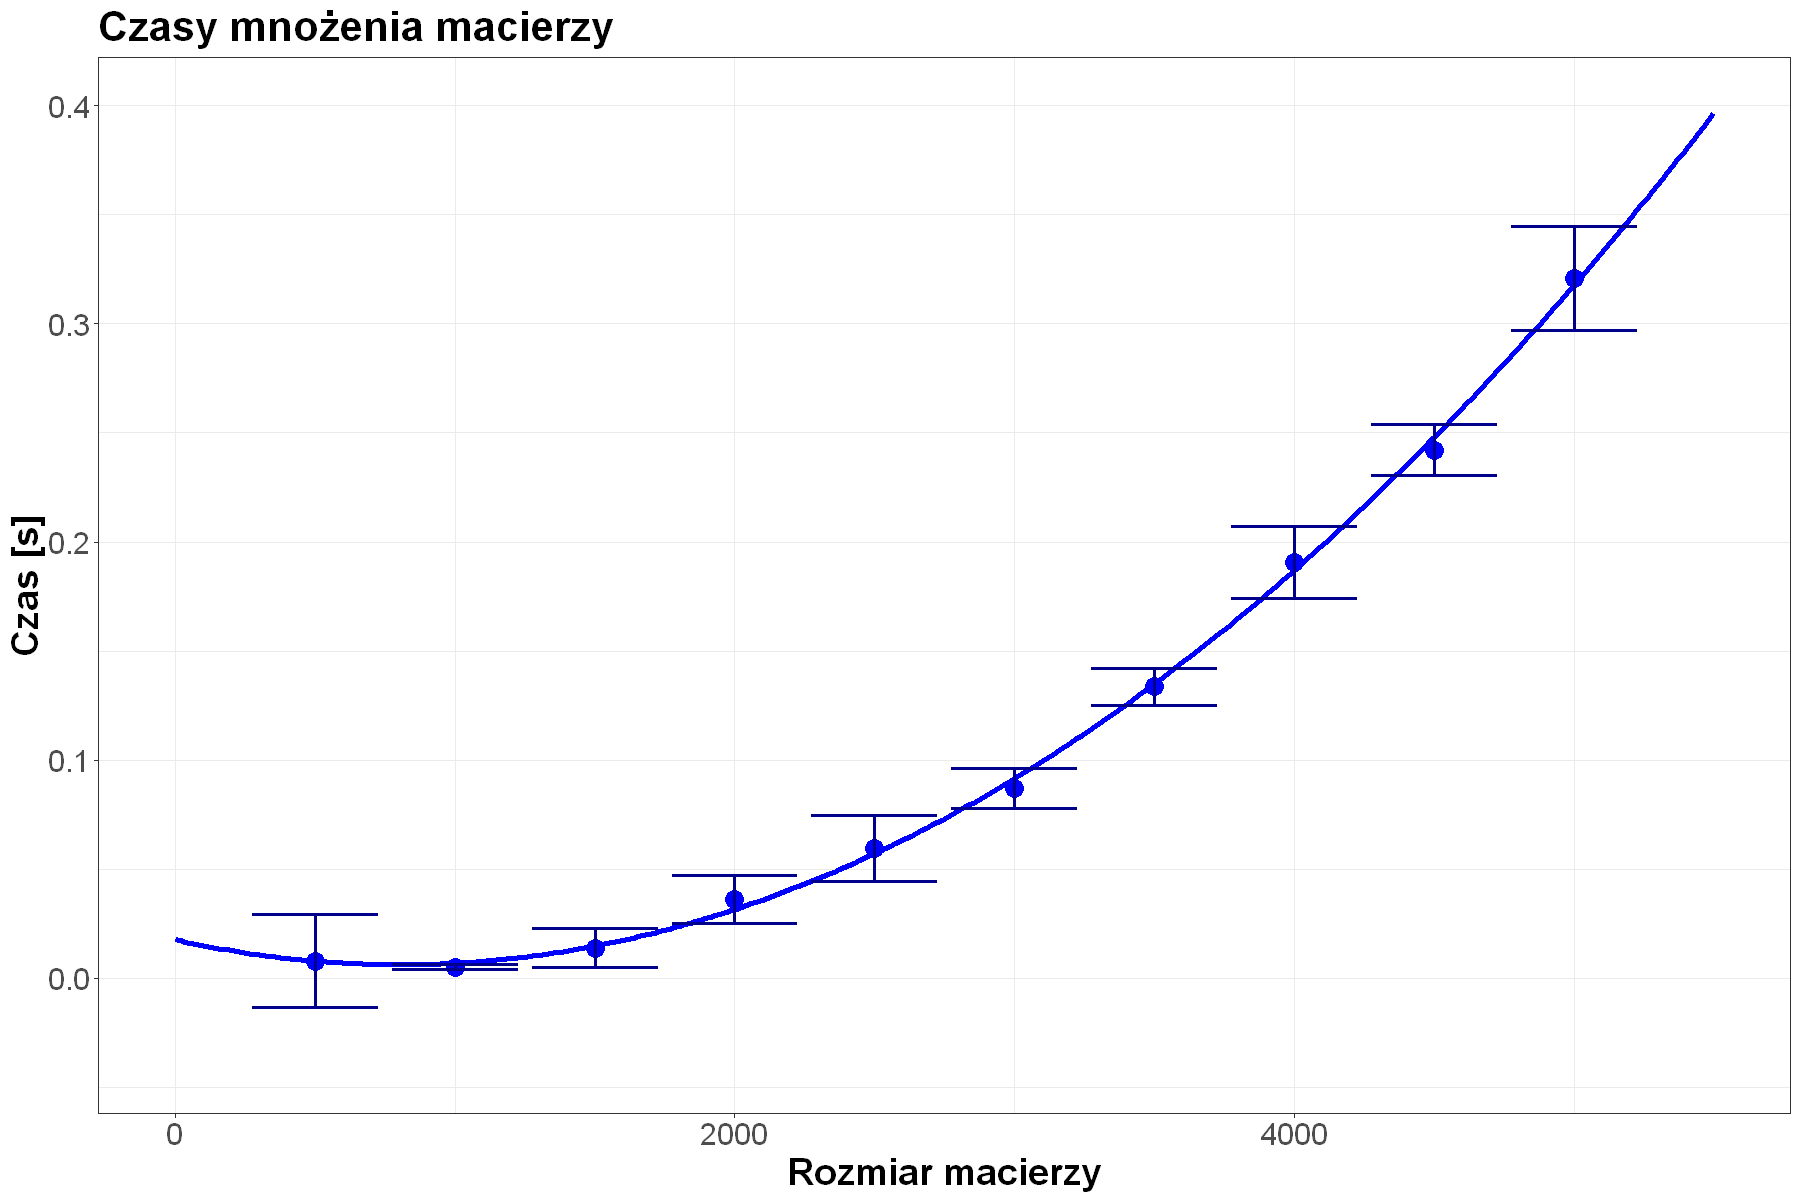

In [253]:
ggplot(avg_results, aes(size, time_matrix)) +
geom_line(data=poly_vec, aes(x,matrix), colour="blue", size=1.5) +
geom_point(colour = "blue", size = 5) + 
geom_errorbar(ymin = avg_results$time_matrix-avg_results$matrix_sd, 
              ymax= avg_results$time_matrix+avg_results$matrix_sd, 
              size = 1, 
              color="darkblue") +
theme_bw() +
theme(axis.text=element_text(size=18),
      axis.title=element_text(size=22,face="bold"),
      plot.title = element_text(size=25, face="bold")) +
ylim(-0.04, 0.4) + 
labs(title ="Czasy mnożenia macierzy (z aproksymacją)", x = "Rozmiar macierzy", y = "Czas [s]")

### Statystyki liczby zarażonych koronawirusem w Polsce

In [398]:
covid19 = read.csv("covid19_stats.csv")

covid19

date,ill
<int>,<int>
4,1
5,1
6,3
7,6
8,11
9,17
10,22
11,31
12,51


#### Dopasowanie modelu wykładniczego do danych

In [559]:
end <- 27


c.0 <- min(covid19$ill) * 0.5
model.0 <- lm(log(ill - c.0) ~ date, data=covid19)
start <- list(a=exp(coef(model.0)[1]), b=coef(model.0)[2], c=c.0)
fit_c_all <- nls(ill ~ a * exp(b * date) + c, data = covid19, start = start)

out_c <- data.frame(x = seq(0, end, 0.1))
out_c$y <- predict(fit_c_all, list(date=out_c$x))

summary(fit_c_all)


Formula: ill ~ a * exp(b * date) + c

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a  15.128385   1.866743   8.104 1.38e-07 ***
b   0.172393   0.004913  35.087  < 2e-16 ***
c -52.603486   8.826613  -5.960 9.78e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.35 on 19 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 5.592e-06


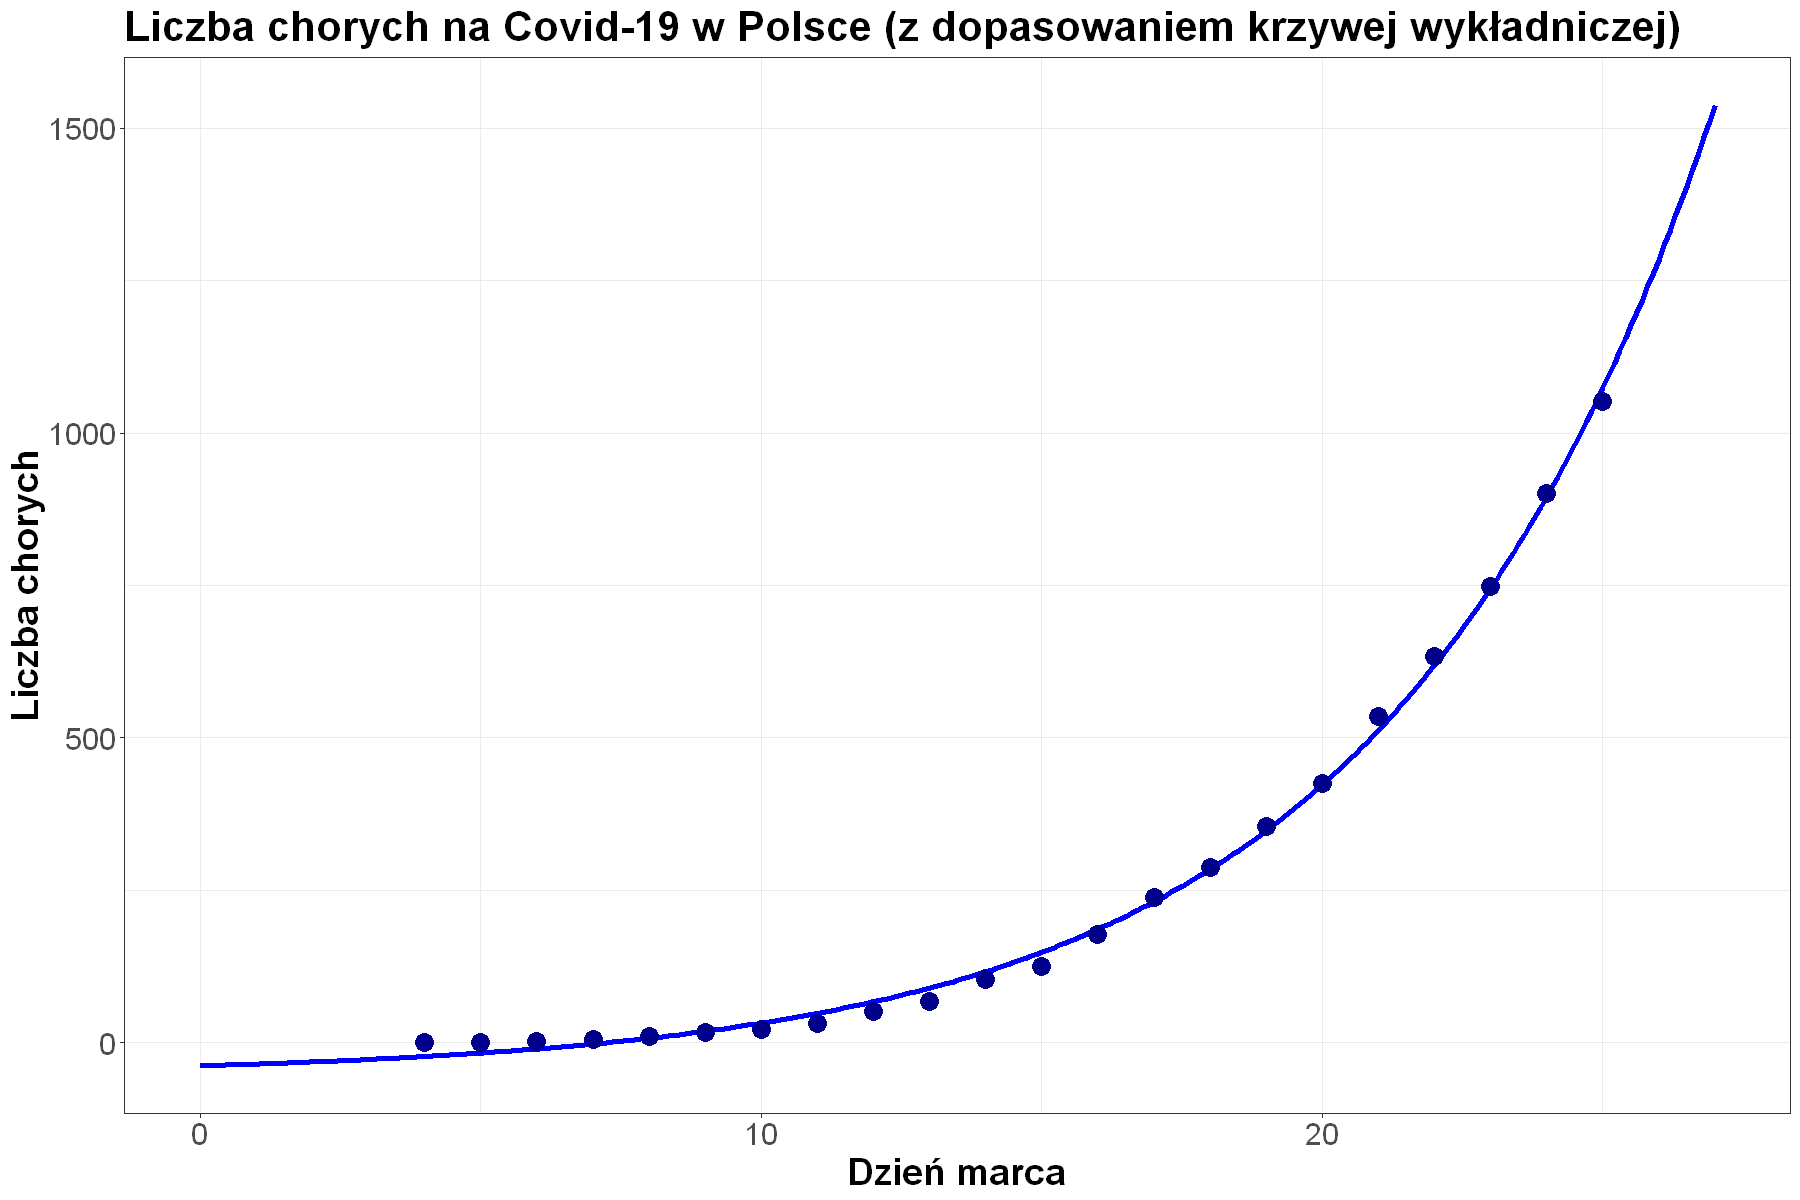

In [560]:
library(repr)
library("ggplot2")
options(repr.plot.width=15, repr.plot.height=10)
ggplot(covid19, aes(date, ill))  +
geom_line(data=out_c, aes(x,y), colour="blue", size=1.5) +
geom_point(colour = "darkblue", size = 5) + 
theme_bw() +
theme(axis.text=element_text(size=18),
      axis.title=element_text(size=22,face="bold"),
      plot.title = element_text(size=25, face="bold")) +
# ylim(-100,10000) + 
# xlim(0, 30) + 
labs(title ="Liczba chorych na Covid-19 w Polsce (z dopasowaniem krzywej wykładniczej)",
     x = "Dzień marca", y = "Liczba chorych")

#### Dopasowanie modeli dla danych z pierwszych i ostatnich 14 dni

In [566]:
covid19_first7 <- head(covid19, 14)
covid19_last7 <- tail(covid19, 14)

c.0 <- min(covid19_first7$ill) * 0.5
model.0 <- lm(log(ill - c.0) ~ date, data=covid19_first7)
start <- list(a=exp(coef(model.0)[1]), b=coef(model.0)[2], c=c.0)
fit_c_f7 <- nls(ill ~ a * exp(b * date) + c, data = covid19_first7, start = start)

c.0 <- min(covid19_last7$ill) * 0.5
model.0 <- lm(log(ill - c.0) ~ date, data=covid19_last7)
start <- list(a=exp(coef(model.0)[1]), b=coef(model.0)[2], c=c.0)
fit_c_l7 <- nls(ill ~ a * exp(b * date) + c, data = covid19_last7, start = start)

summary(fit_c_f7)
summary(fit_c_l7)

out_c$yf7 <- predict(fit_c_f7, list(date=out_c$x))
out_c$yl7 <- predict(fit_c_l7, list(date=out_c$x))


Formula: ill ~ a * exp(b * date) + c

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  1.68553    0.29886   5.640 0.000151 ***
b  0.29296    0.01036  28.270 1.27e-11 ***
c -6.77287    2.34621  -2.887 0.014792 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.564 on 11 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 1.094e-06



Formula: ill ~ a * exp(b * date) + c

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a  2.887e+01  3.258e+00   8.861 2.44e-06 ***
b  1.487e-01  4.166e-03  35.691 1.00e-12 ***
c -1.303e+02  1.468e+01  -8.876 2.40e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.856 on 11 degrees of freedom

Number of iterations to convergence: 20 
Achieved convergence tolerance: 4.419e-07


### Kolorem czerwonym oznaczyłem prognozę opierającą się na dancyn z pierwszych 14 dni, a zielonym - z ostatnich 14 dni.

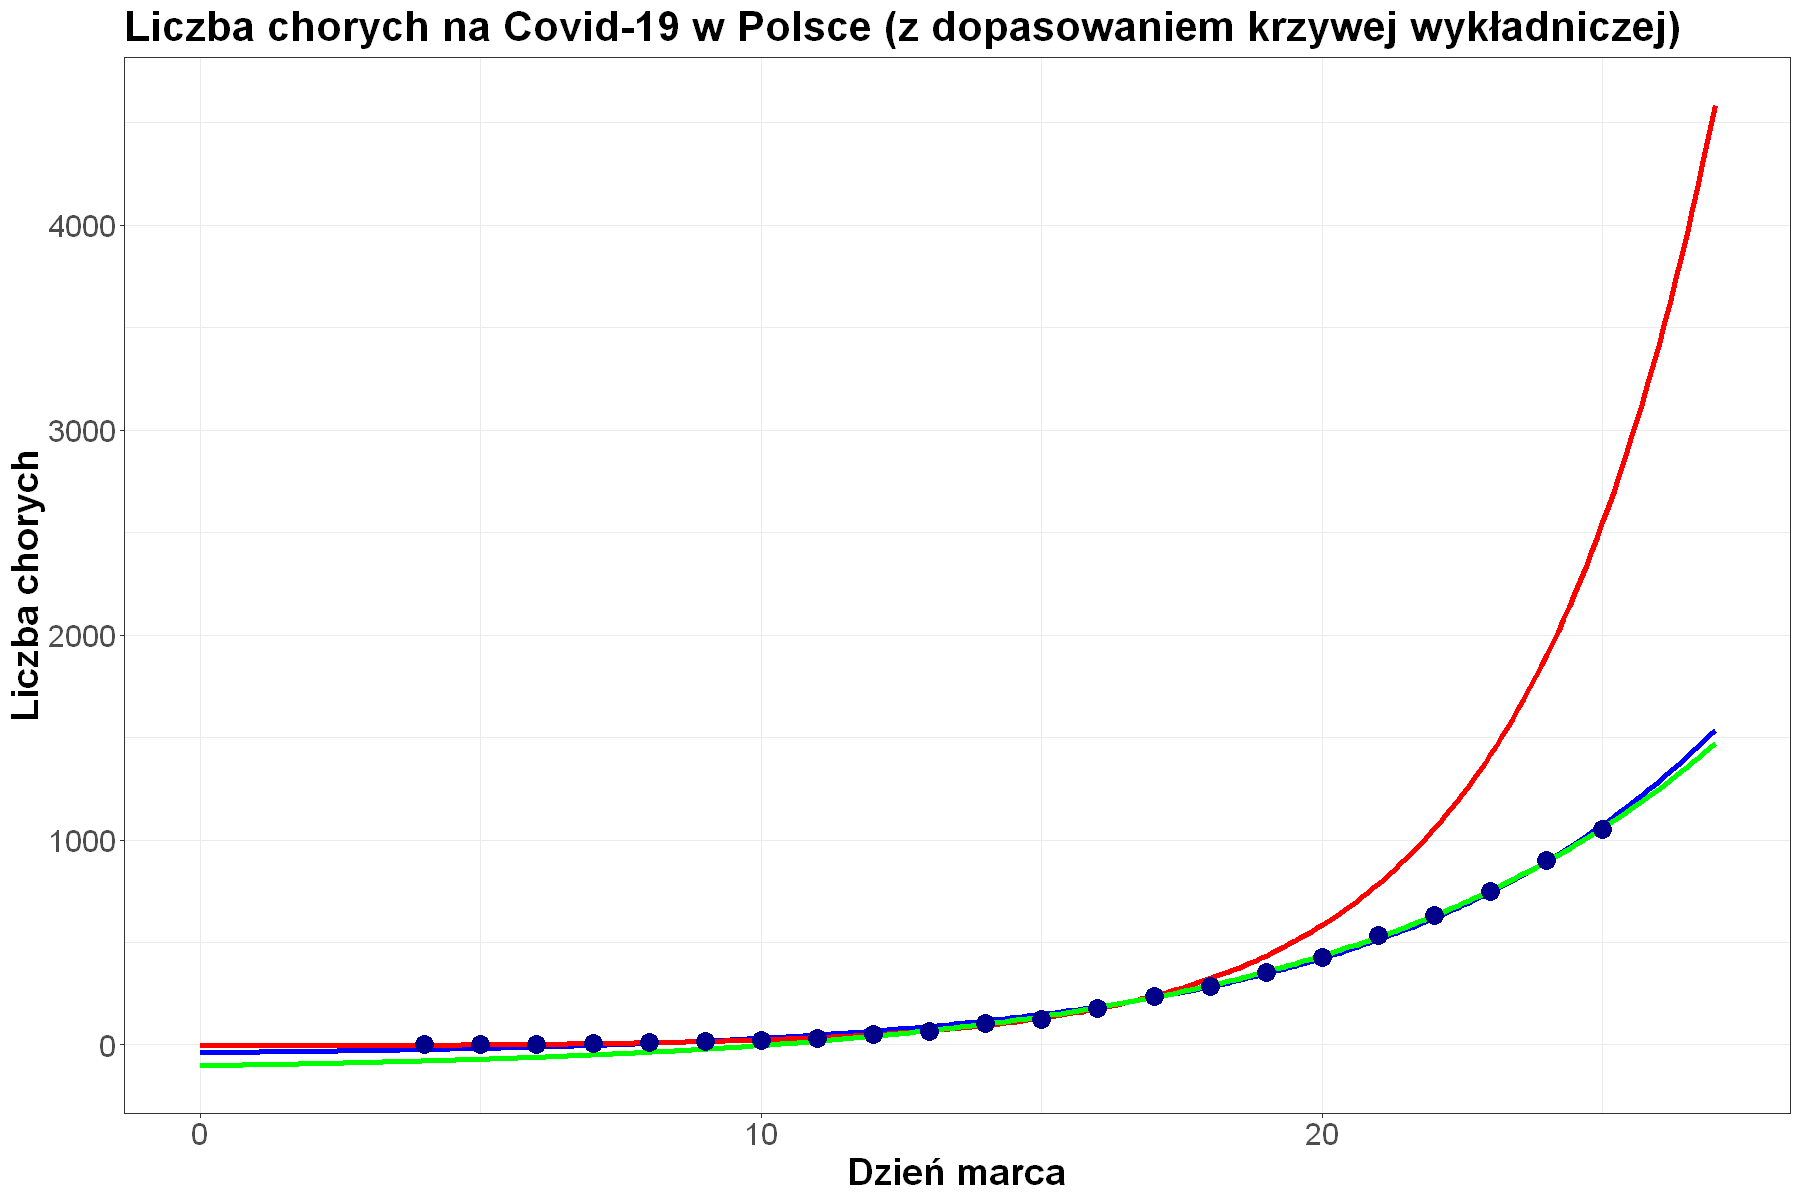

In [562]:
library(repr)
library("ggplot2")
options(repr.plot.width=15, repr.plot.height=10)
ggplot(covid19, aes(date, ill))  +
geom_line(data=out_c, aes(x,y), colour="blue", size=1.5) +
geom_line(data=out_c, aes(x,yf7), colour="red", size=1.5) +
geom_line(data=out_c, aes(x,yl7), colour="green", size=1.5) +
geom_point(colour = "darkblue", size = 5) + 
theme_bw() +
theme(axis.text=element_text(size=18),
      axis.title=element_text(size=22,face="bold"),
      plot.title = element_text(size=25, face="bold"),
      legend.position = "top") +
labs(title ="Liczba chorych na Covid-19 w Polsce (z dopasowaniem krzywej wykładniczej)",
     x = "Dzień marca", y = "Liczba chorych") +
scale_fill_discrete(name = "Legenda",
labels = c("A", "B", "C"))

### Symulacja dla kilku najbliższych dni:
Przeprowadziłem (w chwili, gdy to piszę jest 26-03-2020) symulację do końca marca:



In [563]:
end <- 31
out_c <- data.frame(x = seq(0, end, 0.1))
out_c$y <- predict(fit_c_all, list(date=out_c$x))
out_c$yf7 <- predict(fit_c_f7, list(date=out_c$x))
out_c$yl7 <- predict(fit_c_l7, list(date=out_c$x))


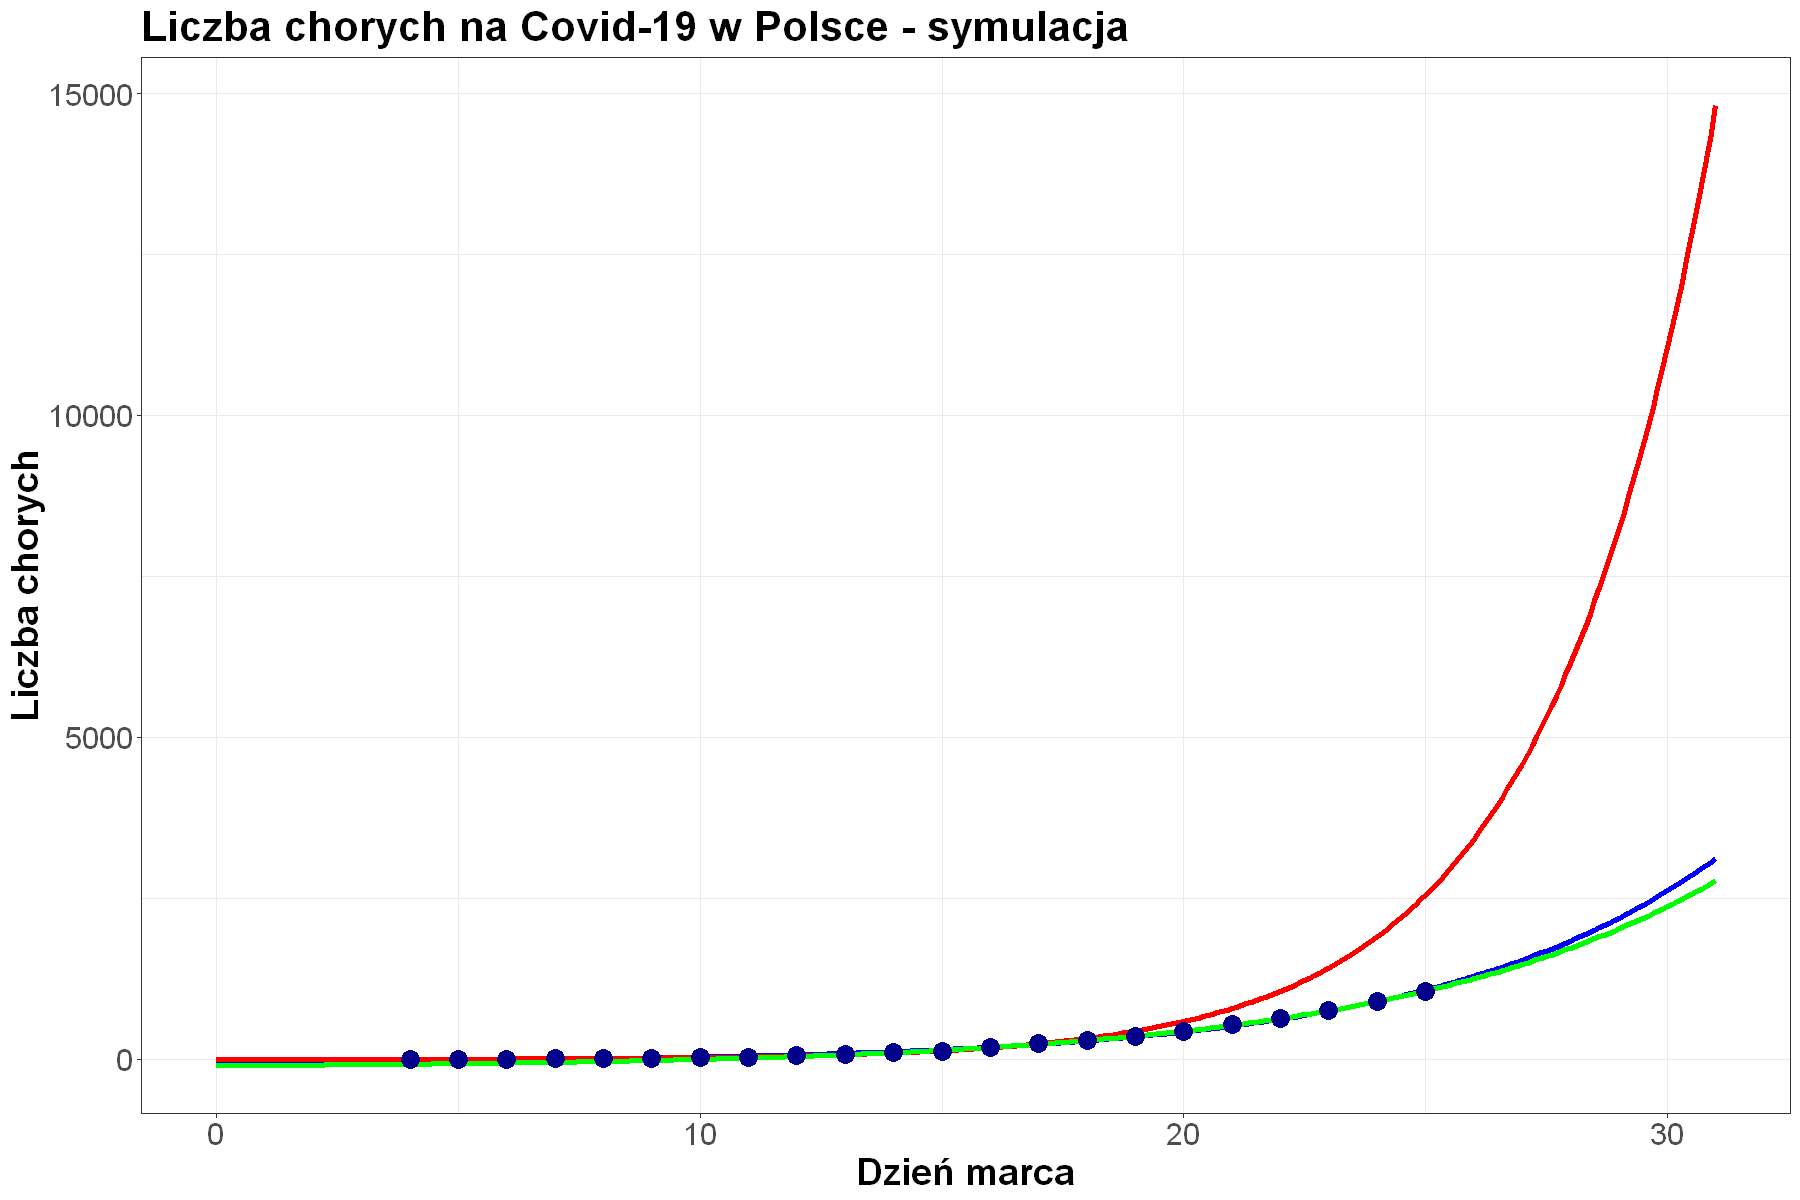

In [564]:
library(repr)
library("ggplot2")
options(repr.plot.width=15, repr.plot.height=10)
ggplot(covid19, aes(date, ill))  +
geom_line(data=out_c, aes(x,y), colour="blue", size=1.5) +
geom_line(data=out_c, aes(x,yf7), colour="red", size=1.5) +
geom_line(data=out_c, aes(x,yl7), colour="green", size=1.5) +
geom_point(colour = "darkblue", size = 5) + 
theme_bw() +
theme(axis.text=element_text(size=18),
      axis.title=element_text(size=22,face="bold"),
      plot.title = element_text(size=25, face="bold")) +
labs(title ="Liczba chorych na Covid-19 w Polsce - symulacja",
     x = "Dzień marca", y = "Liczba chorych")